# DecisionTreeClassifier

In [70]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc,  f1_score, precision_score, recall_score, jaccard_score, log_loss
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import itertools
import joblib

pd.set_option('display.max_columns', None)
pd.set_option('display.precision' , 2)



##### Read the processed data to train

In [52]:
def read_data(file_path):
    """
    Read data from a CSV file into a pandas DataFrame.
    
    """
    try:
        df = pd.read_csv(file_path)
        return df
    except FileNotFoundError:
        print("Error: File not found.")
        return None

In [53]:
processed_datafarme = read_data('../data/processed/train_model_data.csv')

processed_datafarme.head(3)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,BusinessTravel_Non-Travel,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,4.46e-01,1,0.74,-1.01,2,-1.73,2,0,1.38,3,4,0.73,8.0,1,11,1,0.0,0.5,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.32e+00,0,-1.30,-0.15,1,-1.73,3,1,-0.24,2,2,1.49,1.0,0,23,4,1.0,3.0,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,8.34e-03,1,1.41,-0.89,2,-1.73,4,1,1.28,2,3,-1.67,6.0,1,15,2,0.0,3.0,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


##### Split the target and feature variables  

In [54]:
def split_data(df, target_column):
   
    x = df.drop(target_column, axis=1)  # Features
    y = df[target_column]  # Target variable
    return x, y

In [55]:
x , y = split_data(processed_datafarme,'Attrition')

##### Split the data into Train-Test

In [56]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

# Print the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2352, 36)
X_test shape: (588, 36)
y_train shape: (2352,)
y_test shape: (588,)


In [57]:
decision_tree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'min_samples_split': [2, 3, 4, 5, 6, 7],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
    'random_state': [0, 42],
    'criterion':['gini', 'entropy']
}

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(decision_tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 3, 'random_state': 0}


In [58]:
#final model of decision tree
top_model_decision_tree = DecisionTreeClassifier(random_state=0, max_depth=12, min_samples_leaf=1, min_samples_split=3, class_weight='balanced', criterion='entropy')

top_model_decision_tree.fit(X_train, y_train)

MODEL_TRAIN_SCORE = top_model_decision_tree.score(X_train, y_train)

print(f"Training score for Model: {MODEL_TRAIN_SCORE * 100:.2f}%")

#test model

TEST_MODEL_SCORE = top_model_decision_tree.score(X_test, y_test)

print(f"Testing score for Model: {TEST_MODEL_SCORE * 100:.2f}%")

Training score for Model: 95.62%
Testing score for Model: 89.63%


In [59]:

y_pred = top_model_decision_tree.predict(X_test)

print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 89.63 %


In [60]:

print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8962585034013606
Precision Score :  0.8962585034013606
Recall Score :  0.8962585034013606
Jaccard Score :  0.8120184899845917
Log Loss :  3.7392225454696364


In [61]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred)
roc_auc_dt = auc(fpr_dt, tpr_dt)

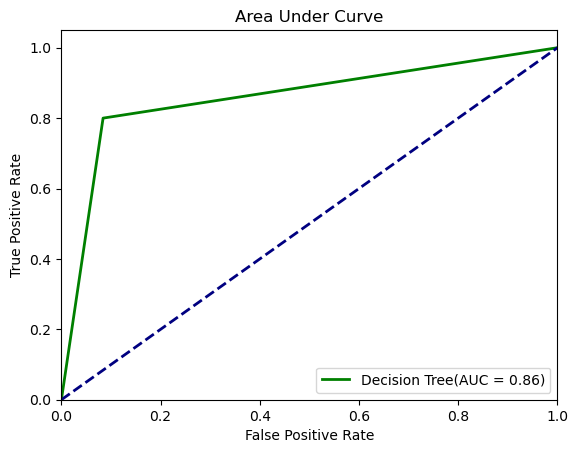

In [62]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [63]:
print (confusion_matrix(y_test, y_pred))

[[447  41]
 [ 20  80]]


In [64]:
accuracy_score(y_test, y_pred)

0.8962585034013606

In [66]:

def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

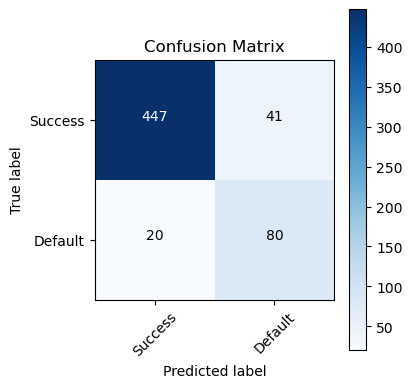

In [69]:
plt.figure(figsize=(4,4))
plot_confusion_matrix(y_pred, normalize=False)
plt.show()

In [71]:
joblib.dump(top_model_decision_tree, '../models/decision_tree_model.pkl')

['../models/decision_tree_model.pkl']